# Predicting Loan Defaults for LendingClub - Data Cleaning

**Aim**: The aim of this notebook is to clean the data and ensure that it is in a format that is ready for analysis.

## Table of contents

1. Importing and describing the data.
2. Dropping features that provide no value.
3. Handling attributes with missing values.
4. Creating the target attribute.

## Package Requirements

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Importing and describing the data

**Objective**: The objective of this section is to understand the data that is under study. 

**Importing the data and viewing the first 5 rows of the data.**

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Viewing basic information with respect to the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

From the information above it can be concluded that:

- The dataset has **74 attributes and 887379 rows.**

## Dropping features that provide no value

**Objective:** This section aims at dropping that features that are redundant and provide no information that can help analyze the loans effectively. 

**Feature 1**: id 

Each loan is uniquely identifed by the 'id' and the 'member_id' attributes. Since both the attributes can uniquely identify each loan one of them can be dropped - the 'id' attribute in this case.

In [5]:
df = df.drop('id', 1)

**Feature 2**: url

The 'url' attribute gives us information about the url link from which the loan data about each borrower was taken from. All of the urls point to Lending Club's official website. This attribute only serves as a means to verify if the data was accurate or not and hence is a good way to verify the quality of the data.

Since it does not directly aid in answering the research questions set out for this project this attribute will be dropped. 

In [6]:
df = df.drop('url', 1)

**Feature 3:** desc

The 'desc' gives a brief description about why the borrower took the loan according to the borrower. Since there is another attribute called 'purpose' which gives the purpose of the loan in a categorical manner this attribute can be discarded. 

In [7]:
df = df.drop('desc', 1)

**Feature 4**: zip_code

Since the data is anonymized the 'zip_code' attribute which gives details about the zip code of the borrower is hidden from the public. This attribute cannot be used and hence can be discarded.

In [8]:
df = df.drop('zip_code', 1)

After dropping the attributes that offered little to no value:

- The dataset now has 70 attributes left that provide some form of valuable information that can answer the research questions proposed.

## Handling attributes with missing values.

**Objective**: The section aims at handling attributes that have missing values by using a wide array of techniques that are commonly used to handle them.

**Attributes with missing values:**

In [9]:
#Extracting the the sum of the missing values for each attribute

missing_values = df.isnull().sum()

#Converting the sum of the missing values for each attribute into a dataframe

missing_df = pd.DataFrame(missing_values)

#Renaming the column to make logical sense

missing_df['number_missing'] = missing_df[0]

#Dropping the renamed column

missing_df = missing_df.drop(0, 1)

#Converting the index to an attribute that contains all the attribute names

missing_df = missing_df.reset_index()
missing_df['attribute'] = missing_df['index']
missing_df = missing_df.drop('index', 1)

#Re-ordering the columns

missing_df = missing_df[['attribute', 'number_missing']]

#Dropping the attributes that have no missing values

missing_df = missing_df[missing_df.number_missing != 0]

#Sorting the dataframe in descending order

missing_df = missing_df.sort_values(by = 'number_missing',  ascending=False)

**Dataframe with percentage missing values for each attribute**

Here the total number of missing values for each attribute is converted to a percentage. 

*Percentage = (Sum of missing values for an attribute / Total number of Rows in the data ) x 100*

In [10]:
missing_df['percent_missing'] = (missing_df['number_missing'] / 887379) * 100

In [11]:
missing_df

,attribute,number_missing,percent_missing
50,dti_joint,886870,99.942640
49,annual_inc_joint,886868,99.942415
51,verification_status_joint,886868,99.942415
61,il_util,868762,97.902024
59,mths_since_rcnt_il,866569,97.654892
68,total_cu_tl,866007,97.591559
67,inq_fi,866007,97.591559
65,all_util,866007,97.591559
64,max_bal_bc,866007,97.591559
63,open_rv_24m,866007,97.591559


In [12]:
missing_df.to_csv('missing_df.csv')

Statistically significant claims cannot be made when over 50% of the data missing in an attribute and imputation techniques will make the outcome of the classifier biased.

Since the literature has established these claims based on the dataset that they used for their analysis, identifying the loss of variables at various thresholds of missing data percentages is logical in this case:

In [13]:
percent_missing = [50, 75, 85, 95]
attributes_lost = [len(missing_df[missing_df['percent_missing'] > 50]), len(missing_df[missing_df['percent_missing'] > 75]), len(missing_df[missing_df['percent_missing'] > 85]), len(missing_df[missing_df['percent_missing'] > 95])]

In [14]:
percent_array = np.array(percent_missing)
attributes_array = np.array(attributes_lost)

D:\Anaconda\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


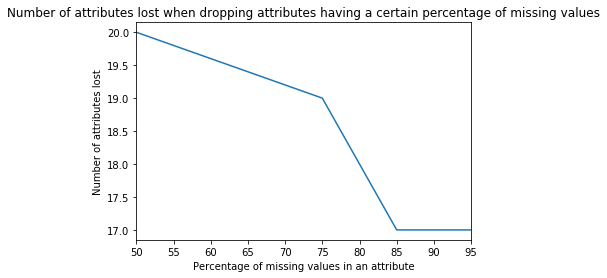

In [15]:
sns.tsplot(attributes_array, percent_array)
plt.xlabel('Percentage of missing values in an attribute')
plt.ylabel('Number of attributes lost')
plt.title('Number of attributes lost when dropping attributes having a certain percentage of missing values')
warnings.filterwarnings('ignore')
plt.show()

From the plot illustrated above the following inferences are made:
    
- Dropping the attributes that have over **85% missing values results in the loss of 17 attributes**.
- Dropping the attributes that have over **75% missing values results in the loss of 19 attributes**.
- Dropping the attributes that have over **50% missing values results in the loss of 20 attributes**.

As a result, dropping attributes that have over 75% of their values missing is an optimal choice as:

- The loss of variables is only 19 instead of 20 in the event of dropping attributes having greater than 50% of their values missing.

**Dropping attributes with over 75% missing values**

In [16]:
#Creating a list of columns to drop

columns_to_drop = missing_df[missing_df['percent_missing'] > 75]
drop_list = columns_to_drop['attribute'].tolist()

#Removing the newline characters from the list

drop_attributes = map(lambda s: s.strip(), drop_list)

#Converting the mapped object to a list

drop_attributes = list(drop_attributes)

#Dropping the attributes from the main dataframe

df = df.drop(drop_attributes, 1)

**Strategies for handling missing values**

From the literature studied for handling imputations for missing values there are 3 categoires of missing values:

- Missing Completely at Random
- Missing at Random
- Not Missing at Random

For the purpose of this analysis the attributes will be grouped into one of the 3 categories and appropriate strategies will be used for the imputations based on the literature and/or common sense backed by domain knowledge.

**Attributes that have data - Missing Completely at Random**

This section deals with imputation of missing values for the attributes that have data missing completely at random. Strategies for imputation that work with such attributes are:

- Deletion of missing value from the attribute
- Single imputation techniques such as mean or median imputation.
- Imputation based on common sense/domain knowledge

**Attribute 1**: 'mths_since_last_delinq'

This attribute simply states the number of months since the borrower's last deliquency. If a borrower has not had a deliquency the corresponding cell is left empty. As a result it makes sense to impute the missing values with 0's as zero months would indicate that the borrower has never had a deliquency. 

In [17]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

**Attribute 2**: 'pub_rec'

This attribute states the number of public deragatory records that the borrower has. The attribute has 29 missing values. 

In [18]:
df['pub_rec'].value_counts()

0.0     751572
1.0     113266
2.0      14854
3.0       4487
4.0       1564
5.0        757
6.0        385
7.0        170
8.0        113
9.0         50
10.0        42
11.0        23
12.0        16
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
49.0         2
19.0         2
40.0         1
86.0         1
20.0         1
23.0         1
63.0         1
22.0         1
28.0         1
34.0         1
26.0         1
54.0         1
Name: pub_rec, dtype: int64

Since the majority of the borrowers have 0 deragatory public records giving the 29 borrowers the benefit of the doubt by imputing the majority category of - 0 makes the most logical sense in this case.

In [19]:
df['pub_rec'] = df['pub_rec'].fillna(0.0)

**Attribute 3**: 'delinq_2yrs'

This attribute is the number of times a borrower has had a 30+ days due incidence of deliquency over the last two years. 

In [20]:
df['delinq_2yrs'].value_counts()

0.0     716961
1.0     113224
2.0      33551
3.0      11977
4.0       5327
5.0       2711
6.0       1471
7.0        784
8.0        461
9.0        284
10.0       192
11.0       121
12.0        89
13.0        64
14.0        45
15.0        28
16.0        17
18.0        11
17.0        10
19.0         8
22.0         3
21.0         2
26.0         2
20.0         2
30.0         1
39.0         1
27.0         1
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

Since the majority of the borrowers have 0, 30+ days deliquency records, giving the 29 borrowers the benefit of the doubt by imputing the majority category of - 0 makes the most logical sense in this case.

In [21]:
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0.0)

**Attribute 4:** 'earliest_cr_line'

This is the earliest reported credit line that was opened by the borrower on record.

In [22]:
#Dataframe where the earliest credit lines are missing

cr_line_missing = df[df['earliest_cr_line'].isnull()]

#Printing out the maximum and minumum annual incomes 

print('The maximum annual income is' + ' ' + str(cr_line_missing['annual_inc'].max()))
print('The minimum annual income is' + ' ' + str(cr_line_missing['annual_inc'].min()))

The maximum annual income is 300000.0
The minimum annual income is 6000.0


The assumption is that borrowers who have similar annual incomes might have started their credit lines on similar dates. Since there are only 29 missing values this assumption will not affect the predictive models built later on in the project.

In [23]:
#Creating a dataframe with a similar range of annual incomes

range_incomes = df[(df['annual_inc'] > 70000) & (df['annual_inc'] < 86000)]

#Extracting the value counts of the earliest credit lines for this range of annual incomes

range_incomes['earliest_cr_line'].value_counts()

Aug-2000    1013
Aug-2001    1011
Oct-2000     965
Oct-2001     959
Nov-1999     909
Sep-1999     906
Sep-2000     905
Aug-1999     897
Aug-2002     883
Sep-2002     883
Nov-2000     869
Sep-1998     853
Oct-1999     848
Jul-2001     812
Oct-1998     777
May-2001     775
Mar-2001     775
Sep-2001     775
Oct-2002     769
Dec-2000     758
Jun-2000     753
Sep-2003     748
Dec-1999     747
Dec-2001     744
Mar-2000     743
Dec-1998     735
May-2000     734
Aug-2003     729
Aug-1998     727
Jan-2000     715
            ... 
Aug-1946       1
Jan-1944       1
Jan-1954       1
May-1962       1
Sep-1962       1
Dec-1962       1
May-1955       1
May-1963       1
Jan-1955       1
Jun-1959       1
Nov-1964       1
Oct-1961       1
May-1959       1
Jul-1960       1
Oct-1950       1
Dec-1958       1
Feb-1965       1
Mar-1958       1
May-1957       1
Sep-1960       1
Feb-1966       1
Aug-1960       1
Mar-1962       1
Jun-1963       1
Dec-1964       1
Jun-1961       1
Aug-1959       1
Jan-1950      

In [24]:
#Imputing the missing values with a random value

df["earliest_cr_line"].fillna(lambda x: random.choice(range_incomes[range_incomes['earliest_cr_line'] != np.nan]["earliest_cr_line"]), inplace =True)

Imputed the missing values with a random earliest credit line date from the borrowers who had an annual income in the range between 70,000 to 80,000 US dollars a year. 

**Attribute 5:** 'inq_last_6mths'

This is the number of inquires that the borrower has had in the last 6 months.

In [25]:
df['inq_last_6mths'].value_counts()

0.0     497905
1.0     241494
2.0      94117
3.0      37398
4.0      10758
5.0       3985
6.0       1231
7.0        195
8.0        122
9.0         50
10.0        24
11.0        15
12.0        15
15.0         9
14.0         6
13.0         6
18.0         4
16.0         3
17.0         2
19.0         2
24.0         2
31.0         1
32.0         1
25.0         1
28.0         1
20.0         1
33.0         1
27.0         1
Name: inq_last_6mths, dtype: int64

Since the majority of the inquires are 0 and since there are only 29 missing values imputing the missing values with 0 makes the most logical sense in this case. 

In [26]:
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0.0)

**Attribute 6**: 'acc_now_delinq'

This attribute states the number of times the borrowers account has been declared deliquent.

In [27]:
df['acc_now_delinq'].value_counts()

0.0     883236
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

Since the majority of the values are 0 and since there are only 29 missing values imputing the missing values with 0 makes the most logical sense in this case. 

In [28]:
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0.0)

**Attribute 7:** 'open_acc'

This attribute states the number of open credit lines in the borrowers file. On further exploration of the missing values:

- There does not seem to be a trend that explains why these values are missing for the borrower. 
- There is no 'majority' value that is missing.

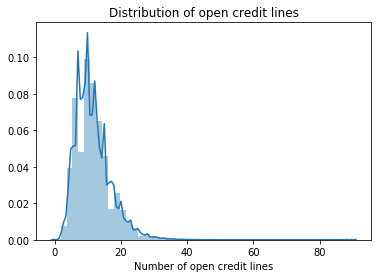

In [29]:
#Imputing the 'NaN' to 0 temporarily in order to visualize the distribution

df['open_accs'] = df['open_acc'].fillna(0)

#Visualizing the distribution of the 'open_acc'

sns.distplot(df['open_accs'])
plt.title('Distribution of open credit lines')
plt.xlabel('Number of open credit lines')
plt.show()
warnings.filterwarnings('ignore')

Since the distribution is fairly normal in nature, imputing the missing values with the mean of the values in the attribute will ensure that the variance is not changed too much and that there is no additional bias added. 

In [30]:
#Dropping the dummy column created earlier

df = df.drop('open_accs', 1)

#Imputing the missing values with the mean

df['open_acc'] = df['open_acc'].fillna(df['open_acc'].mean())

**Attribute 8:** 'total_acc'

This provides information on the total number of credit lines on the borrower's account.

- There does not seem to be a trend that explains why these values are missing for the borrower. 
- There is no 'majority' value that is missing.

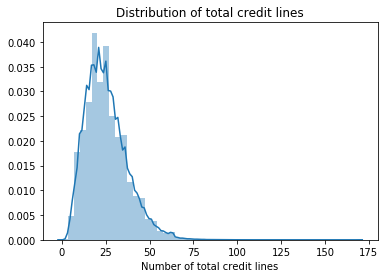

In [31]:
#Imputing the 'NaN' to 0 temporarily in order to visualize the distribution

df['total_accs'] = df['total_acc'].fillna(0)

#Visualizing the distribution of the 'total_acc'

sns.distplot(df['total_accs'])
plt.title('Distribution of total credit lines')
plt.xlabel('Number of total credit lines')
plt.show()
warnings.filterwarnings('ignore')

Since the distribution is fairly normal in nature, imputing the missing values with the mean of the values in the attribute will ensure that the variance is not changed too much and that there is no additional bias added. 

In [32]:
#Dropping the dummy column created earlier

df = df.drop('total_accs', 1)

#Imputing the missing values with the mean

df['total_acc'] = df['total_acc'].fillna(df['total_acc'].mean())

**Attribute 10**: 'collections_12_mths_ex_med'

This attribute provides information on the number of collections on the borrower's account excluding medical collections.

In [33]:
df['collections_12_mths_ex_med'].value_counts()

0.0     875553
1.0      10824
2.0        732
3.0         88
4.0         23
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

Since the majority of the collections are 0 and since there are only 145 missing values imputing the missing values with 0 makes the most logical sense in this case. 

In [34]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0.0)

**Attribute 11**: 'revol_util'

This attributes provides information on the number of credit the borrower is using relative to all avaliable revolving credit.

On closer inspection of the attribute:

- There is no value that stands out as the majority value.
- There is no trend or pattern to the values that are missing.
- Only 0.05% of the values are missing.

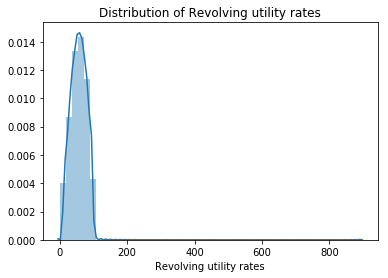

In [35]:
#Imputing the 'NaN' to 0 temporarily in order to visualize the distribution

df['revol_utils'] = df['revol_util'].fillna(0)

#Visualizing the distribution of the 'total_acc'

sns.distplot(df['revol_utils'])
plt.title('Distribution of Revolving utility rates')
plt.xlabel('Revolving utility rates')
plt.show()
warnings.filterwarnings('ignore')

Since the distribution is fairly normal in nature, imputing the missing values with the mean of the values in the attribute will ensure that the variance is not changed too much and that there is no additional bias added.

In [36]:
#Dropping the dummy column created earlier

df = df.drop('revol_utils', 1)

#Imputing the missing values with the mean

df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

**Attribute 12**: 'annual_inc'

This attributes provides information about the annual income of the borrower.

On closer inspection of the attribute:

- There is no value that stands out as the majority value.
- There is no trend or pattern to the values that are missing.
- Only 0.0004% of the values are missing.

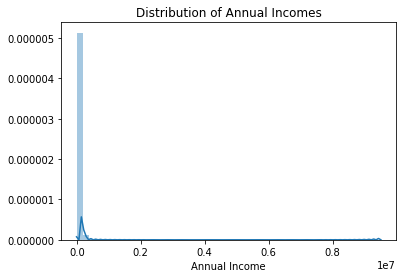

In [37]:
#Imputing the 'NaN' to 0 temporarily in order to visualize the distribution

df['annual_incs'] = df['annual_inc'].fillna(0)

#Visualizing the distribution of the 'total_acc'

sns.distplot(df['annual_incs'])
plt.title('Distribution of Annual Incomes')
plt.xlabel('Annual Income')
plt.show()
warnings.filterwarnings('ignore')

The distribution of annual income is fairly normal in nature except for a few outliers towards the extreme end of the distribution.

- Due to the precense of outliers the median imputation for the 4 missing values will have the least bias. 

In [38]:
#Dropping the dummy column created earlier

df = df.drop('annual_incs', 1)

#Imputing the missing values with the mean

df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())

## Creating the target attribute.

**Objective:** The aim of this section is to create the target attribute that is going to be of utmost importance in predicting defaults.

In [39]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

A quick look at the different types of loan status gives the following information:

- Due to the objective of the project being predicting **loan defaults** two categories are of importance - 'Default' and 'Not Default'
- The **Fully Paid** loans are the loans that have not defaulted.
- The **Default** loans are the loans that have defaulted.
- The **Charged Off** loans are the loans that gone past the stage of default and has been written off by LendingClub. This means that these loans will never be paid back.
- Two types of loans status that does not meet the credit policy exist but have a 'Fully Paid' and 'Charged Off' label associated with them - Hence they can be categorized accordingly. 
- Thus **Default**,**Charged Off** & **Does not meet the credit policy. Status:Charged Off** will be categorized into one category - **Default** and is given a value of 1.
- **Fully Paid** & **Does not meet the credit policy. Status:Fully Paid** will be categorized as **Not Default** and is given a value of 0.

In [40]:
#Dropping all loan statuses except for Full Paid, Charged Off and Default

df1 = df[df['loan_status'].str.contains("Current") == False]
df2 = df1[df1['loan_status'].str.contains("Late") == False]
df3 = df2[df2['loan_status'].str.contains("Issued") == False]
df_target = df3[df3['loan_status'].str.contains("In Grace Period") == False]

In [41]:
df_target['loan_status'].value_counts()

Fully Paid                                             207723
Charged Off                                             45248
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

The data now only has the loan statuses that are of interest.

**Creating the target attribute**

In [42]:
df_target['default'] = (df_target['loan_status'] == 'Charged Off') | (df_target['loan_status'] == 'Default') | (df_target['loan_status'] == 'Does not meet the credit policy. Status:Charged Off')

In [43]:
df_target['default'] = df_target['default'].astype(int)

In [44]:
df_target['default'].value_counts()

0    209711
1     47228
Name: default, dtype: int64

From the information above it can be concluded that:

- The dataset now has **256939** rows. 
- **18%** of the loans are classfied as Default. 
- **78** of the loans are classfied as Not default.

**Creating a new file for analysis**

In [45]:
df_target.to_csv('loan_analysis.csv')